# Notebook TP 0¶

You will use this notebook to answer the exercises. You can add text (markdown) or code cells as you see fit, but you are not allowed to delete cells.

In this first session, we take control of the software: we experiment the visualizing methods of two variable functions (graph and isovalues)


Type in this cell the number of the team and the names of the participating students:
### BEGIN SOLUTION
### END SOLUTION


# Visualization of a 2d function

In a code cell, load the libraries  numpy, math and matplotlib + specific 3D tools

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline 


Consider the 3 functions
\begin{eqnarray}
quad: R^n\rightarrow R, \quad quad(X)&=&\frac{1}{2}\langle Ax,x\rangle+\langle b,x\rangle +c,\quad A\in R^{n\times n},~b\in R^n,~c\in R\\
f24:R^2\rightarrow R, \quad f24(X)&=& {(x_1-2)^2+(x_2-3)^4},
\\
rast: R^n\rightarrow  R,\quad rast(X)&=&n+||X||^2-\sum_{i=1}^n\cos(\beta x_i), \mbox{  with } \beta=5.
\end{eqnarray}


In [20]:
A=np.array([[3.,-0.2],[-0.2,2.]])
B=np.array([-2.6,-3.8])
X=np.array([1.,2.])
C=5.1
print (X,A,B,C)
print (X.shape,A.shape)

[1. 2.] [[ 3.  -0.2]
 [-0.2  2. ]] [-2.6 -3.8] 5.1
(2,) (2, 2)


Program a function quad(X), the arrays $A$, $B$ and the float $C$ are globally defined  

In [21]:
def quad(X):
### BEGIN SOLUTION
    if not isinstance(X, np.ndarray):
        raise ValueError(" X input argument shoud be numpy array")
    if X.shape != (2,):
        raise ValueError("invalid shape for X input argument")
    return np.dot(np.dot(A,X),X)/2+np.dot(B,X)+C
### END SOLUTION

Test your function on the values defined above. You should get 
0 for quad(X,A,B,C)

In [22]:
assert quad(X)==0.0
assert quad(np.array([1.,1.])) == 0.9999999999999991

Check that your function returns an error if the arrays do not have the correct shape

In [23]:
quad(A)

ValueError: invalid shape for X input argument

The following cell draws the graph and isovalues of the  quad function

In [ ]:
n1=50
n2=40
x1_=np.linspace(-3.,5.,n1)
x2_=np.linspace(-3.,5.,n2)
s_=np.zeros((n2,n1))
#sx1_=np.zeros((n1,n2))
#sx2_=np.zeros((n1,n2))
print (s_)
sx1_,sx2_=np.meshgrid(x1_,x2_)
for i in range(n1):
    for j in range (n2):
        s_[j,i]=quad(np.array([x1_[i],x2_[j]]))
#print s_, sx1_,sx2_
fig = plt.figure()
fig.clf()

ax = fig.add_subplot(121, projection='3d')

ax.plot_surface(sx1_,sx2_,s_,rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')
ax.set_title('Graph and isovalues \n of the quad function')
ay = fig.add_subplot(122)

ay.contour(sx1_,sx2_,s_)
ay.set_xlabel('x1')
ay.set_ylabel('x2')
fig.tight_layout()


#ax.contour(sx1_,sx2_,s_)

Adapt the above code to define a function displaying the graph and isovalues of a function passed in input


In [ ]:
def plot_function(fun,center,dimensions):
    # fun : name of the function to be drawn
    # center : center of the display area (list or np.array of length 2)
    # dimensions :half dimensions of the display area  (list or np.array of length 2)
    # your code below
    ### BEGIN SOLUTION
    n1=50
    n2=40
    x1_=np.linspace(center[0]-dimensions[0],center[0]+dimensions[0],n1)
    x2_=np.linspace(center[1]-dimensions[1],center[1]+dimensions[1],n2)
    s_=np.zeros((n2,n1))


    sx1_,sx2_=np.meshgrid(x1_,x2_)
    for i in range(n1):
        for j in range (n2):
            s_[j,i]=fun(np.array([x1_[i],x2_[j]]))
    fig = plt.figure()
    fig.clf()

    ax = fig.add_subplot(121, projection='3d')

    ax.plot_surface(sx1_,sx2_,s_,rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f')
    ax.set_title('Graph and isovalues \n of the quad function')
    ay = fig.add_subplot(122)

    ay.contour(sx1_,sx2_,s_)
    ay.set_xlabel('x1')
    ay.set_ylabel('x2')
    fig.tight_layout()
    ### END SOLUTION


Test the  plot_function  function on the quad function

In [ ]:
### BEGIN SOLUTION
plot_function(quad,[1,2],[2,2])
### END SOLUTION

Program functions $f23(x)$. This function should take a numpy array of shape (2,) as input argument. 

In [ ]:
def f23(x):
    ### BEGIN SOLUTION
    return (x[0]-2.)**2+(x[1]-3.)**4
    ### END SOLUTION

In [ ]:
X=np.array([1.,2.])
assert f23(X)==2.0

Program function $rast(x)$. This function should take a numpy array of shape (2,) as input argument

In [ ]:
def rast(x):
    ### BEGIN SOLUTION
    beta=5.
    y=len(x)+np.linalg.norm(x)**2-np.sum(np.cos(beta*x))
    return y
    ### END SOLUTION

In [ ]:
X=np.array([1.,2.])
assert rast(X)==7.555409343613227

Draw the graph and isovalues of  function $f23$ for an interesting range values. 

In [ ]:
### BEGIN SOLUTION
center=[2,3]
dimensions=[4,4]
plot_function(f23,center, dimensions)
### END SOLUTION

Draw the graph and isovalues of  function  $rast$ for an interesting range values. 

In [ ]:
### BEGIN SOLUTION
center=[0,0]
dimensions=[2,2]
plot_function(rast,center, dimensions)
### END SOLUTION

Modify  the function plot_function so that it also draws a red cross in a given point $x_x$ sent in input as an optionnal  $4^{th}$ argument.


In [ ]:
def plot_function(fun,center,dimensions,point=center):
    # fun : name of the function to be drawn
    # center : center of the display area (list or np.array of length 2)
    # dimensions :half dimensions of the display area  (list or np.array of length 2)
    # point : location for a red cross
    # your code below
    ### BEGIN SOLUTION
    n1=50
    n2=40
    x1_=np.linspace(center[0]-dimensions[0],center[0]+dimensions[0],n1)
    x2_=np.linspace(center[1]-dimensions[1],center[1]+dimensions[1],n2)
    s_=np.zeros((n2,n1))


    sx1_,sx2_=np.meshgrid(x1_,x2_)
    for i in range(n1):
        for j in range (n2):
            s_[j,i]=fun(np.array([x1_[i],x2_[j]]))
    fig = plt.figure()
    fig.clf()

    ax = fig.add_subplot(121, projection='3d')

    ax.plot_surface(sx1_,sx2_,s_,rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.plot(point[0],point[1],fun(np.array(point)),'rx')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f')
    ax.set_title('Graph and isovalues \n of the quad function')
    ay = fig.add_subplot(122)

    ay.contour(sx1_,sx2_,s_)
    ay.plot(point[0],point[1],'rx')
    ay.set_xlabel('x1')
    ay.set_ylabel('x2')
    fig.tight_layout()
    ### END SOLUTION

Test the modify $plot\_function$ on $f23$ and $rast$

In [ ]:
### BEGIN SOLUTION
center=[2,3]
dimensions=[4,4]
plot_function(f23,center, dimensions)
center=[0,0]
dimensions=[2,2]
plot_function(rast,center, dimensions)
### END SOLUTION

In [24]:
def circle(X):
    if not isinstance(X, np.ndarray):
        raise ValueError(" X input argument shoud be numpy array")
    if X.shape != (2,):
        raise ValueError("invalid shape for X input argument")
    return np.linalg.norm(X)**2
def circ_exp(X):
    if not isinstance(X, np.ndarray):
        raise ValueError(" X input argument shoud be numpy array")
    if X.shape != (2,):
        raise ValueError("invalid shape for X input argument")
    return np.exp(-X[0])*np.linalg.norm(X)**2


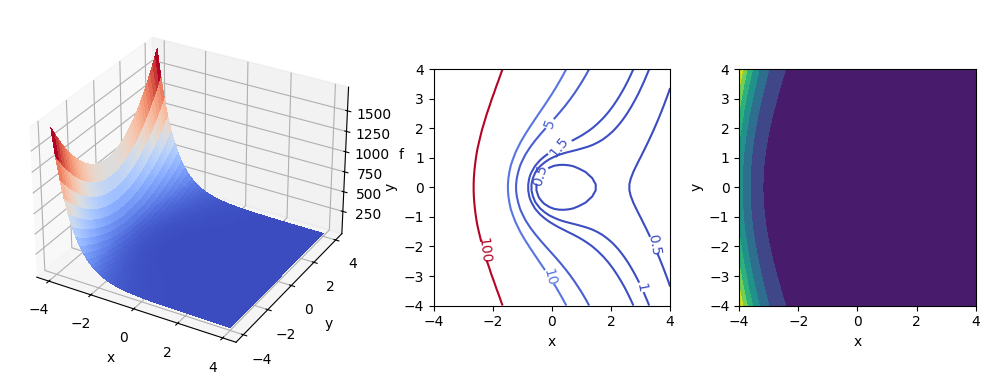

In [52]:
import matplotlib.gridspec as gridspec
# This custom formatter removes trailing zeros, e.g. "1.0" becomes "1"
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"


def makefig3(fun):
    n1=50
    n2=40
    x1_=np.linspace(-4.,4.,n1)
    x2_=np.linspace(-4.,4.,n2)
    s_=np.zeros((n2,n1))
    sx1_,sx2_=np.meshgrid(x1_,x2_)
    for i in range(n1):
        for j in range (n2):
            s_[j,i]=fun(np.array([x1_[i],x2_[j]]))
    fig = plt.figure(figsize=(10, 6))
    fig.clf()
    gs = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1.5, 1, 1])
    levels = [0.5,1,1.5,5,10,100]
    ax = plt.subplot(gs[0, 0], projection='3d')

    ax.plot_surface(sx1_,sx2_,s_,rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f')

    ay = plt.subplot(gs[0, 1])



    
    CS =ay.contour(sx1_,sx2_,s_,cmap=cm.coolwarm,levels=levels)
 
    ay.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

    ay.set_xlabel('x')
    ay.set_ylabel('y')
    ay.set_aspect('equal')

    az = plt.subplot(gs[0, 2])
    az.contourf(sx1_,sx2_,s_)
    az.set_xlabel('x')
    az.set_ylabel('y')
    az.set_aspect('equal')
    fig.tight_layout()

makefig3(circ_exp)

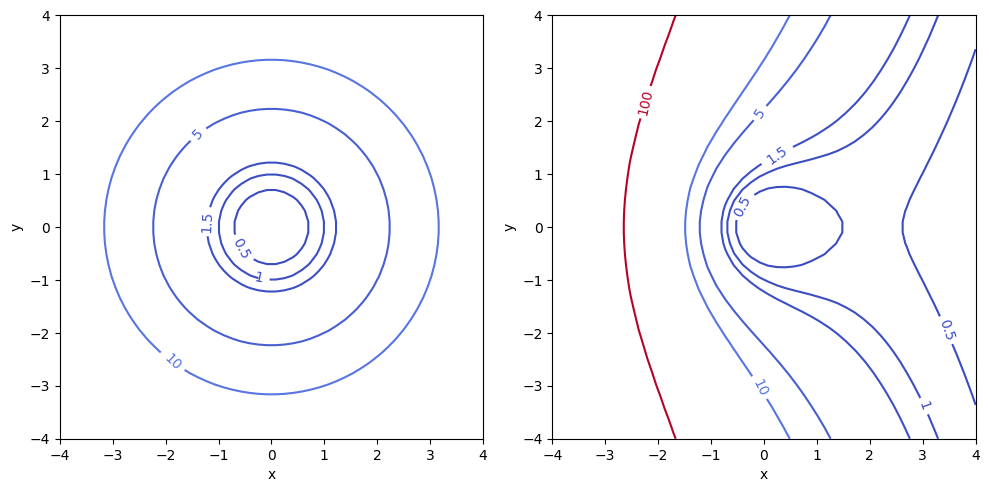

In [55]:
def makefig2():
    n1=50
    n2=40
    x1_=np.linspace(-4.,4.,n1)
    x2_=np.linspace(-4.,4.,n2)
    s1_=np.zeros((n2,n1))
    s2_=np.zeros((n2,n1))
    sx1_,sx2_=np.meshgrid(x1_,x2_)
    for i in range(n1):
        for j in range (n2):
            s1_[j,i]=circle(np.array([x1_[i],x2_[j]]))
            s2_[j,i]=circ_exp(np.array([x1_[i],x2_[j]]))
    fig = plt.figure(figsize=(10, 6))
    fig.clf()
    gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[ 1, 1])
    levels = [0.5,1,1.5,5,10,100]

    ay = plt.subplot(gs[0, 0]) 
    CS =ay.contour(sx1_,sx2_,s1_,cmap=cm.coolwarm,levels=levels)
    ay.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
    ay.set_xlabel('x')
    ay.set_ylabel('y')
    ay.set_aspect('equal')

    az = plt.subplot(gs[0, 1])
    CS2 =az.contour(sx1_,sx2_,s2_,cmap=cm.coolwarm,levels=levels)
    az.clabel(CS2, CS2.levels, inline=True, fmt=fmt, fontsize=10)
    az.set_xlabel('x')
    az.set_ylabel('y')
    az.set_aspect('equal')
    fig.tight_layout()
    plt.savefig('../FIGURES/contour.png')
makefig2()